In [4]:
#Purnima Rangavajjula
#S5 CSE A
#AM.EN.U4CSE21046

Naive Bayes Model - Wildlife conservation

Naive Bayes is a family of probabilistic machine learning algorithms based on the Bayes theorem, with the "naive" assumption of independence between features.
Bayes' Theorem:

P(A∣B)=
P(B)
P(B∣A)⋅P(A)
​


P(Class∣Features)=
P(Features)
P(Features∣Class)⋅P(Class)
​
Here are a few key types of Naive Bayes classifiers:

Multinomial Naive Bayes:

Suitable for discrete data, often used in text classification (e.g., document categorization).
Assumes features represent the frequencies with which certain events have been generated by a multinomial distribution.

Gaussian Naive Bayes:

Assumes that features follow a normal (Gaussian) distribution.
Suitable for continuous data.

Bernoulli Naive Bayes:

Suitable for binary data (features that are either present or absent).
Often used in text classification with binary features.


GaussianNB() is a class in scikit-learn that implements the Gaussian Naive Bayes algorithm. Gaussian Naive Bayes is particularly suitable for classification tasks where features are continuous and assumed to be normally distributed within each class. The term "Naive" comes from the assumption that features are conditionally independent given the class, which simplifies the model.

Class Priors: Estimate the probability of each class based on the training data
P(Class=c)=
Total number of instances/
Number of instances of class c
​


Class-Conditional Probabilities:



Posterior Probability:





Prediction:

Choose the class with the highest posterior probability as the predicted class for a given set of features.

Import Necessary Libraries

In [5]:
import librosa as ls
import pandas as pd
#from lifelines.datasets import  load_dd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import json
import ast
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import seaborn as sns
import joblib
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import LabelEncoder

Load the dataset and explore

In [6]:
df = pd.read_csv(r"/content/fd3.csv")
df.head(n=4)

,File_ID,Filename,Spectral_Centroid,Spectral_Bandwidth,Spectral_Contrast,Spectral_Rolloff,Chroma,Spectral_Flatness,Zero_Crossing_Rate,HNR,species
0,0,XC100213.mp3,4116.189458,2193.760985,20.003973,5991.788678,0.369853,0.060670,0.346447,2.501654e-07,Bird
1,1,XC100251.mp3,4261.538777,2846.498340,19.124991,7534.970936,0.559703,0.146034,0.337061,8.686239e-08,Bird
2,2,XC100479.mp3,6060.823275,2119.443755,25.646550,8289.603882,0.450026,0.027006,0.543093,2.150358e-10,Bird
3,3,XC100600.mp3,4580.187914,1965.629338,19.168746,6364.989870,0.368529,0.113970,0.388023,1.353291e-06,Bird


Splitting into Train-Test

In [7]:
features = df[['Spectral_Centroid','Spectral_Bandwidth','Spectral_Contrast','Spectral_Rolloff','Chroma',	'Spectral_Flatness','Zero_Crossing_Rate',	'HNR']]
target = df['species']

In [8]:
# Convert categorical labels to numerical format
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f"Number of samples in the training set: {len(X_train)}")
print(f"Number of samples in the testing set: {len(X_test)}")


Number of samples in the training set: 3784
Number of samples in the testing set: 946


In [10]:
model = GaussianNB()

In [11]:
model.fit(X_train, y_train)

GaussianNB()

In [12]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.8739429175475687


In [13]:
y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)

In [15]:
print(f"Training Accuracy: {model.score(X_train, y_train):.2f}")
print(f"Testing Accuracy: {accuracy:.2f}")

Training Accuracy: 0.87
Testing Accuracy: 0.86


In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[480  72]
 [ 57 337]]


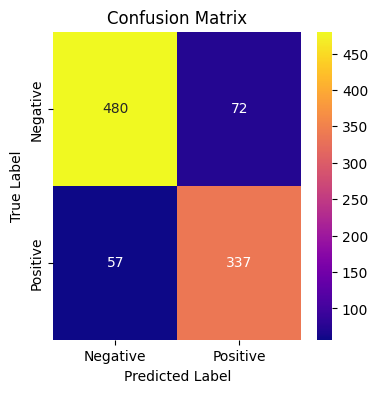

In [17]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       552
           1       0.82      0.86      0.84       394

    accuracy                           0.86       946
   macro avg       0.86      0.86      0.86       946
weighted avg       0.86      0.86      0.86       946



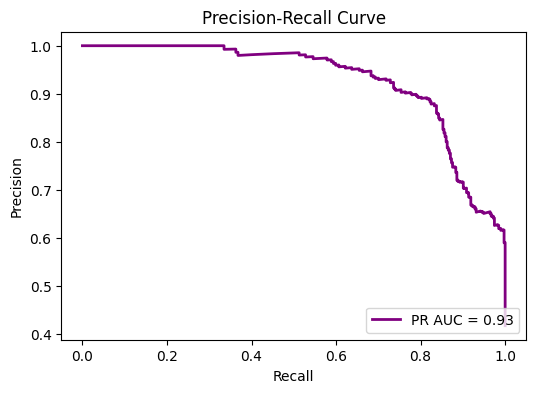

In [20]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

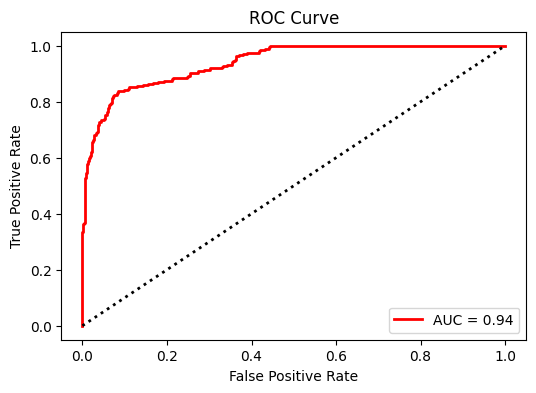

In [21]:
# Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#The End